## Chapter 8. Model Selection

### Example 8.2 Overfitting

Let's generate observations fom the model

$$
Y_i = (X_i - 0.25)^2 - 1 + N(0, 0.1^2), \qquad X_i \sim U([0,1]), \qquad i = 1, \dots, 11
$$

In [25]:
clear
rng= 120;
x = rand(11,1);
y = (x - 0.25).^2 - 1 + normrnd(0, 0.1, [11,1]);

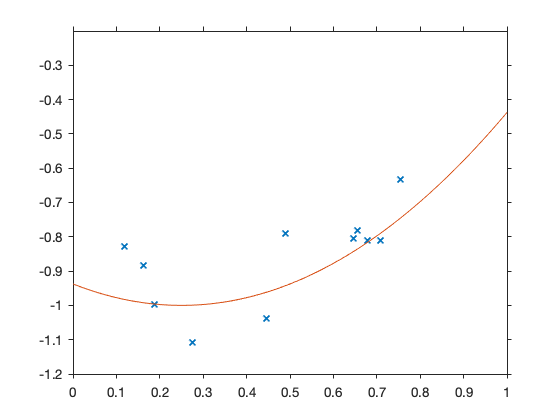

In [26]:
plot(x,y, 'x')
xlim([0,1])
ylim([-1.2,-0.2])
hold on 
fplot(@(x) (x - 0.25).^2 - 1)
hold off

Then we fit a linear, a quadratic and a (9th degree)-polynomial model. 

In [27]:
data = table(x,y)

data =
  11x2 table
       x          y    
    _______    ________
    0.18687     -0.9967
    0.48976    -0.78925
    0.44559     -1.0387
    0.64631     -0.8058
    0.70936    -0.81154
    0.75469    -0.63356
    0.27603     -1.1082
     0.6797     -0.8121
     0.6551    -0.78064
    0.16261     -0.8823
      0.119    -0.82842


In [28]:
m1 = fitlm(data, 'linear')

m1 = 
Linear regression model:
    y ~ 1 + x

Estimated Coefficients:
                   Estimate       SE        tStat      pValue  
                   ________    ________    _______    _________
    (Intercept)     -1.021     0.077309    -13.206    3.392e-07
    x              0.34015      0.14874     2.2869     0.048017

Number of observations: 11, Error degrees of freedom: 9
Root Mean Squared Error: 0.114
R-squared: 0.368,  Adjusted R-Squared: 0.297
F-statistic vs. constant model: 5.23, p-value = 0.048


In [29]:
m2 = fitlm(data, 'quadratic')

m2 = 
Linear regression model:
    y ~ 1 + x + x^2

Estimated Coefficients:
                   Estimate      SE        tStat       pValue  
                   ________    _______    _______    __________
    (Intercept)    -0.73939     0.1263    -5.8544    0.00038089
    x               -1.4805    0.72481    -2.0426      0.075371
    x^2              2.0976    0.82407     2.5454      0.034419

Number of observations: 11, Error degrees of freedom: 8
Root Mean Squared Error: 0.0896
R-squared: 0.651,  Adjusted R-Squared: 0.563
F-statistic vs. constant model: 7.45, p-value = 0.0149


In [30]:
m9 = fitlm(data, 'y ~ 1 + x^2 + x^3 + x^4 + x^5 + x^6 + x^7 + x^8 + x^9')

m9 = 
Linear regression model:
    y ~ 1 + x + x^2 + x^3 + x^4 + x^5 + x^6 + x^7 + x^8 + x^9

Estimated Coefficients:
                    Estimate          SE         tStat     pValue 
                   ___________    __________    _______    _______
    (Intercept)        -56.075        17.423    -3.2185    0.19178
    x                   1662.8        525.92     3.1616    0.19502
    x^2                 -20875        6687.6    -3.1215    0.19737
    x^3             1.4395e+05         47159     3.0524    0.20155
    x^4            -6.0339e+05    2.0367e+05    -2.9626    0.20724
    x^5             1.5997e+06    5.5966e+05     2.8583    0.21426
    x^6             -2.693e+06    9.8075e+05    -2.7459    0.22234
    x^7             2.7887e+06    1.0598e+06     2.6313    0.23121
    x^8            -1.6195e+06    6.4282e+05    -2.5194    0.24055
    x^9             4.0364e+05    1.6726e+05     2.4132    0.25009

Number of observations: 11, Error degrees of freedom: 1
Root Mean Squared Err

In [31]:
b1 = m1.Coefficients{:,1};
b2 = m2.Coefficients{:,1};
b9 = m9.Coefficients{:,1};

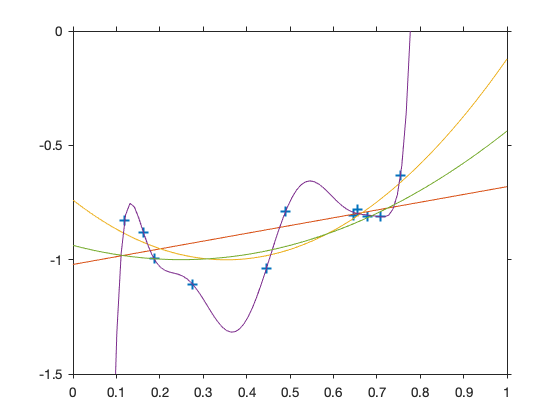

In [32]:
plot(x,y, '+')
hold on 
z = linspace(0,1, 100);
plot(z, polyval(rot90(b1'), z))
plot(z, polyval(rot90(b2'), z))
plot(z, polyval(rot90(b9'), z))
fplot(@(x) (x - 0.25).^2 - 1)
xlim([0,1])
ylim([-1.5,0])
hold off


Apply the fitted data to a new data set from the same model

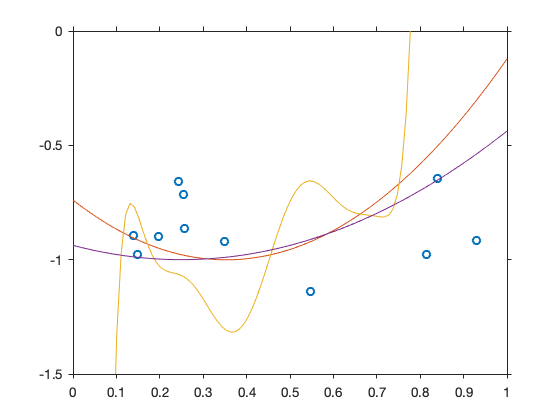

In [33]:
xnew = rand(11,1);
ynew = (x - 0.25).^2 - 1 + normrnd(0, 0.1, [11,1]);

plot(xnew,ynew, 'o')
hold on 
z = linspace(0,1, 100);
%plot(z, polyval(rot90(b1'), z))
plot(z, polyval(rot90(b2'), z))
plot(z, polyval(rot90(b9'), z))
fplot(@(x) (x - 0.25).^2 - 1)
xlim([0,1])
ylim([-1.5,0])
hold off

## Model selection 

Our example is based on cement hardening data. Four predictor variables (as a percentage by weight) are used to predict the dependent variable `heat` measuring􏰸 calories of heat evolved per gram of cement after 180 days of hardening.

- `heat`: heat of hardening after 180 days (cal/gm)
- `x1` : 3CaO.Al2O3 (tricalcium aluminate)                
- `x2`: 3CaO.SiO2 (tricalcium silicate)                  
- `x3`: 4CaO.Al2O3.Fe2O3 (tetracalcium aluminoferrite)   
- `x4`: 2CaO.SiO2 (beta-dicalcium silicate)              
                                                                                       
                                                              
**Source**                                        

Woods,H., H. Steinour, H. Starke (1932). Effect of Composition of Portland Cement on Heat Evolved during Hardening, *Industrial and Engineering Chemistry*, vol. 24 no. 11, 1207-1214.                          
                                                              
**Reference**                                                
    
Hald,A. (1960). *Statistical Theory with Engineering Applications*, Wiley.


In [34]:
heat = [78.5000
   74.3000
  104.3000
   87.6000
   95.9000
  109.2000
  102.7000
   72.5000
   93.1000
  115.9000
   83.8000
  113.3000
  109.4000];

In [35]:
 x1 = [ 7     1    11    11     7    11     3     1     2    21     1    11    10 ]';
 x2 = [ 26    29    56    31    52    55    71    31    54    47    40    66    68]';
 x3 = [  6    15     8     8     6     9    17    22    18     4    23     9     8]';
 x4  =[ 60    52    20    47    33    22     6    44    22    26    34    12    12]';

Notice that the explanatory variables sum up approximately to 100.

In [36]:
x1 + x2 + x3 + x4

ans =
    99
    97
    95
    97
    98
    97
    97
    98
    96
    98
    98
    98
    98


In [37]:
cement = table(heat, x1, x2, x3, x4)

cement =
  13x5 table
    heat     x1    x2    x3    x4
    _____    __    __    __    __
     78.5     7    26     6    60
     74.3     1    29    15    52
    104.3    11    56     8    20
     87.6    11    31     8    47
     95.9     7    52     6    33
    109.2    11    55     9    22
    102.7     3    71    17     6
     72.5     1    31    22    44
     93.1     2    54    18    22
    115.9    21    47     4    26
     83.8     1    40    23    34
    113.3    11    66     9    12
    109.4    10    68     8    12


"What approximating model to use?" is the primary focus of this example. The sample size is quite quite small with respect to the number of variables. 

We can use several different approaches:

- Test methods
- Penalty methods (AIC, BIC) 
- Cross validation

### Test methods

**Step-up method**. Fit first a null model and then try to improve the fit by adding predictors. The criterion is the  p-value for an F-test (equivalent for single terms is the t-test). 

In [38]:
m0 = fitlm(cement, 'heat ~ 1')

m0 = 
Linear regression model:
    heat ~ 1

Estimated Coefficients:
                   Estimate      SE      tStat      pValue  
                   ________    ______    _____    __________
    (Intercept)     95.423     4.1724    22.87    2.8992e-11

Number of observations: 13, Error degrees of freedom: 12
Root Mean Squared Error: 15


In [39]:
step(m0, 'Criterion', 'sse','NSteps', 3,  'Upper', 'linear', 'Lower', 'linear', 'Verbose', 2)

   pValue for adding x1 is 0.004552
   pValue for adding x2 is 0.00066482
   pValue for adding x3 is 0.059762
   pValue for adding x4 is 0.00057623
1. Adding x4, FStat = 22.7985, pValue = 0.000576232
   pValue for adding x1 is 1.1053e-06
   pValue for adding x2 is 0.68668
   pValue for adding x3 is 8.3755e-05
2. Adding x1, FStat = 108.2239, pValue = 1.105281e-06
   pValue for adding x2 is 0.051687
   pValue for adding x3 is 0.069692
   No candidate terms to remove
ans = 
Linear regression model:
    heat ~ 1 + x1 + x4

Estimated Coefficients:
                   Estimate       SE        tStat       pValue  
                   ________    ________    _______    __________
    (Intercept)       103.1       2.124      48.54    3.3243e-13
    x1                 1.44     0.13842     10.403    1.1053e-06
    x4             -0.61395    0.048645    -12.621    1.8149e-07

Number of observations: 13, Error degrees of freedom: 10
Root Mean Squared Error: 2.73
R-squared: 0.972,  Adjusted R-Squared:

The final model contains `x1` and `x4`.

**Step-down methods**. Fit the complete linear model. Then drop predictor until no further step improves the criterion. 

In [40]:
mlin = fitlm(cement, 'heat ~ 1 + x1 + x2 + x3 + x4')

mlin = 
Linear regression model:
    heat ~ 1 + x1 + x2 + x3 + x4

Estimated Coefficients:
                   Estimate      SE        tStat       pValue 
                   ________    _______    ________    ________
    (Intercept)      62.405     70.071      0.8906     0.39913
    x1               1.5511    0.74477      2.0827    0.070822
    x2              0.51017    0.72379     0.70486      0.5009
    x3              0.10191    0.75471     0.13503     0.89592
    x4             -0.14406    0.70905    -0.20317     0.84407

Number of observations: 13, Error degrees of freedom: 8
Root Mean Squared Error: 2.45
R-squared: 0.982,  Adjusted R-Squared: 0.974
F-statistic vs. constant model: 111, p-value = 4.76e-07


In [41]:
step(mlin, 'Criterion', 'sse','NSteps', 3,  'Upper', 'constant', 'Lower', 'constant', 'Verbose', 2)

   No candidate terms to add
   pValue for removing x1 is 0.070822
   pValue for removing x2 is 0.5009
   pValue for removing x3 is 0.89592
   pValue for removing x4 is 0.84407
1. Removing x3, FStat = 0.018233, pValue = 0.89592
   No candidate terms to add
   pValue for removing x1 is 5.7808e-07
   pValue for removing x2 is 0.051687
   pValue for removing x4 is 0.2054
2. Removing x4, FStat = 1.8633, pValue = 0.2054
   No candidate terms to add
   pValue for removing x1 is 2.6922e-07
   pValue for removing x2 is 5.029e-08
ans = 
Linear regression model:
    heat ~ 1 + x1 + x2

Estimated Coefficients:
                   Estimate       SE       tStat       pValue  
                   ________    ________    ______    __________
    (Intercept)     52.577       2.2862    22.998    5.4566e-10
    x1              1.4683       0.1213    12.105    2.6922e-07
    x2             0.66225     0.045855    14.442     5.029e-08

Number of observations: 13, Error degrees of freedom: 10
Root Mean Squar

This time the chosen model contains `x1` and `x2`.  

We can alternate the step-up and step-down procedures. 

In [42]:
step(m0, 'Criterion', 'sse','NSteps', 3,  'Upper', 'linear', 'Lower', 'constant', 'Verbose', 2)

   pValue for adding x1 is 0.004552
   pValue for adding x2 is 0.00066482
   pValue for adding x3 is 0.059762
   pValue for adding x4 is 0.00057623
1. Adding x4, FStat = 22.7985, pValue = 0.000576232
   pValue for adding x1 is 1.1053e-06
   pValue for adding x2 is 0.68668
   pValue for adding x3 is 8.3755e-05
2. Adding x1, FStat = 108.2239, pValue = 1.105281e-06
   pValue for adding x2 is 0.051687
   pValue for adding x3 is 0.069692
   pValue for removing x4 is 1.8149e-07
ans = 
Linear regression model:
    heat ~ 1 + x1 + x4

Estimated Coefficients:
                   Estimate       SE        tStat       pValue  
                   ________    ________    _______    __________
    (Intercept)       103.1       2.124      48.54    3.3243e-13
    x1                 1.44     0.13842     10.403    1.1053e-06
    x4             -0.61395    0.048645    -12.621    1.8149e-07

Number of observations: 13, Error degrees of freedom: 10
Root Mean Squared Error: 2.73
R-squared: 0.972,  Adjusted R-

### Penalty methods

We can use AIC or BIC (Bayesian). These methods aim at selecting models that are better for prediction. They can be used with the step-up or step-down strategies. 

Add predictors until no further step improves the AIC

In [43]:
step(m0, 'Criterion', 'AIC','NSteps', 3,  'Upper', 'linear', 'Lower', 'linear', 'Verbose', 2)

   Change in AIC for adding x1 is -7.925
   Change in AIC for adding x2 is -12.2664
   Change in AIC for adding x3 is -2.377
   Change in AIC for adding x4 is -12.5928
1. Adding x4, AIC = 95.744
   Change in AIC for adding x1 is -30.1099
   Change in AIC for adding x2 is 1.7777
   Change in AIC for adding x3 is -18.9991
2. Adding x1, AIC = 65.6341
   Change in AIC for adding x2 is -3.7678
   Change in AIC for adding x3 is -3.0142
3. Adding x2, AIC = 61.8663
ans = 
Linear regression model:
    heat ~ 1 + x1 + x2 + x4

Estimated Coefficients:
                   Estimate      SE       tStat       pValue  
                   ________    _______    ______    __________
    (Intercept)      71.648     14.142    5.0662    0.00067533
    x1               1.4519      0.117     12.41    5.7808e-07
    x2              0.41611    0.18561    2.2418      0.051687
    x4             -0.23654    0.17329    -1.365        0.2054

Number of observations: 13, Error degrees of freedom: 9
Root Mean Squared 

Fit the complete linear model. Then drop predictor until no further step improves the AIC.

In [44]:
step(mlin, 'Criterion', 'AIC','NSteps', 3,  'Upper', 'linear', 'Lower', 'constant', 'Verbose', 2)

   No candidate terms to add
   Change in AIC for removing x1 is 3.6316
   Change in AIC for removing x2 is -1.2167
   Change in AIC for removing x3 is -1.9704
   Change in AIC for removing x4 is -1.9331
1. Removing x3, AIC = 61.866
   No candidate terms to add
   Change in AIC for removing x1 is 35.6554
   Change in AIC for removing x2 is 3.7678
   Change in AIC for removing x4 is 0.44611
ans = 
Linear regression model:
    heat ~ 1 + x1 + x2 + x4

Estimated Coefficients:
                   Estimate      SE       tStat       pValue  
                   ________    _______    ______    __________
    (Intercept)      71.648     14.142    5.0662    0.00067533
    x1               1.4519      0.117     12.41    5.7808e-07
    x2              0.41611    0.18561    2.2418      0.051687
    x4             -0.23654    0.17329    -1.365        0.2054

Number of observations: 13, Error degrees of freedom: 9
Root Mean Squared Error: 2.31
R-squared: 0.982,  Adjusted R-Squared: 0.976
F-statistic 

AIC promotes the use of the variable `x4` in both strategies. 

Next we use BIC.

In [45]:
step(m0, 'Criterion', 'BIC','NSteps', 3,  'Upper', 'linear', 'Lower', 'linear', 'Verbose', 2)

   Change in BIC for adding x1 is -7.36
   Change in BIC for adding x2 is -11.7015
   Change in BIC for adding x3 is -1.8121
   Change in BIC for adding x4 is -12.0278
1. Adding x4, BIC = 96.8739
   Change in BIC for adding x1 is -29.545
   Change in BIC for adding x2 is 2.3426
   Change in BIC for adding x3 is -18.4341
2. Adding x1, BIC = 67.329
   Change in BIC for adding x2 is -3.2029
   Change in BIC for adding x3 is -2.4492
3. Adding x2, BIC = 64.1261
ans = 
Linear regression model:
    heat ~ 1 + x1 + x2 + x4

Estimated Coefficients:
                   Estimate      SE       tStat       pValue  
                   ________    _______    ______    __________
    (Intercept)      71.648     14.142    5.0662    0.00067533
    x1               1.4519      0.117     12.41    5.7808e-07
    x2              0.41611    0.18561    2.2418      0.051687
    x4             -0.23654    0.17329    -1.365        0.2054

Number of observations: 13, Error degrees of freedom: 9
Root Mean Squared E

In [46]:
step(mlin, 'Criterion', 'BIC','NSteps', 3,  'Upper', 'linear', 'Lower', 'constant', 'Verbose', 2)

   No candidate terms to add
   Change in BIC for removing x1 is 3.0666
   Change in BIC for removing x2 is -1.7817
   Change in BIC for removing x3 is -2.5354
   Change in BIC for removing x4 is -2.498
1. Removing x3, BIC = 64.126
   No candidate terms to add
   Change in BIC for removing x1 is 35.0905
   Change in BIC for removing x2 is 3.2029
   Change in BIC for removing x4 is -0.11884
2. Removing x4, BIC = 64.007
   Change in BIC for adding x3 is 0.15615
   Change in BIC for removing x1 is 33.1931
   Change in BIC for removing x2 is 37.5345
ans = 
Linear regression model:
    heat ~ 1 + x1 + x2

Estimated Coefficients:
                   Estimate       SE       tStat       pValue  
                   ________    ________    ______    __________
    (Intercept)     52.577       2.2862    22.998    5.4566e-10
    x1              1.4683       0.1213    12.105    2.6922e-07
    x2             0.66225     0.045855    14.442     5.029e-08

Number of observations: 13, Error degrees of fr

In the step-down strategy BIC gives as the result the same predictors `x1`, `x2` of the test methods.

**Note**:  "The importance of carefully defining a small set of candidate models, based on the objective and what is known about the problem, cannot be overemphasized." (Burnham and Anderson, 2002).

### Air Pollution

From the Bijma et al. (2016, p. 325) book: "In New York, in the summer of 1973, daily measurements were carried out to study the relation between the ozone concentration and a number of other meteorological variables. In addition to the ozone concentration, the solar radiation, the wind speed, and the temperature were measured. Ozone is an important component of smog. It forms from nitrogen dioxides and volatile hydrocarbons under the influence of sunlight. In warm weather with little wind, the ozone concentration can rise sharply and cause respiratory problems."

The data set is the following one.

In [16]:
X = [ 41 190 11.9066 19.4444444444444 5 1
 36 118 12.872 22.2222222222222 5 2
 12 149 20.2734 23.3333333333333 5 3
 18 313 18.5035 16.6666666666667 5 4
 23 299 13.8374 18.3333333333333 5 7
 19 99 22.2042 15 5 8
 8 19 32.3409 16.1111111111111 5 9
16 256 15.6073 20.5555555555556 5 12
11 290 14.8028 18.8888888888889 5 13
14 274 17.5381 20 5 14
18 65 21.2388 14.4444444444444 5 15
14 334 18.5035 17.7777777777778 5 16
34 307 19.308 18.8888888888889 5 17
6 78 29.6056 13.8888888888889 5 18
30 322 18.5035 20 5 19
11 44 15.6073 16.6666666666667 5 20
1 8 15.6073 15 5 21
11 320 26.7094 22.7777777777778 5 22
4 25 15.6073 16.1111111111111 5 23
32 92 19.308 16.1111111111111 5 24
23 13 19.308 19.4444444444444 5 28
45 252 23.9741 27.2222222222222 5 29
115 223 9.1713 26.1111111111111 5 30
37 279 11.9066 24.4444444444444 5 31
29 127 15.6073 27.7777777777778 6 7
71 291 22.2042 32.2222222222222 6 9
39 323 18.5035 30.5555555555556 6 10
23 148 12.872 27.7777777777778 6 13
21 191 23.9741 25 6 16
37 284 33.3063 22.2222222222222 6 17
20 37 14.8028 18.3333333333333 6 18
12 120 18.5035 22.7777777777778 6 19
13 137 16.5727 24.4444444444444 6 20
135 269 6.5969 28.8888888888889 7 1
49 248 14.8028 29.4444444444444 7 2
32 236 14.8028 27.2222222222222 7 3
64 175 7.4014 28.3333333333333 7 5
40 314 17.5381 28.3333333333333 7 6
77 276 8.2059 31.1111111111111 7 7
97 267 10.1367 33.3333333333333 7 8
97 272 9.1713 33.3333333333333 7 9
85 175 11.9066 31.6666666666667 7 10
10 264 23.0087 22.7777777777778 7 12
27 175 23.9741 27.2222222222222 7 13
7 48 23.0087 26.6666666666667 7 15
48 260 11.1021 27.2222222222222 7 16
35 274 16.5727 27.7777777777778 7 17
61 285 10.1367 28.8888888888889 7 18
79 187 8.2059 30.5555555555556 7 19
63 220 18.5035 29.4444444444444 7 20
16 7 11.1021 23.3333333333333 7 21
80 294 13.8374 30 7 24
108 223 12.872 29.4444444444444 7 25
20 81 13.8374 27.7777777777778 7 26
52 82 19.308 30 7 27
82 213 11.9066 31.1111111111111 7 28
50 275 11.9066 30 7 29
64 253 11.9066 28.3333333333333 7 30
59 254 14.8028 27.2222222222222 7 31
39 83 11.1021 27.2222222222222 8 1
9 24 22.2042 27.2222222222222 8 2
16 77 11.9066 27.7777777777778 8 3
122 255 6.436 31.6666666666667 8 7
 89 229 16.5727 32.2222222222222 8 8
 110 207 12.872 32.2222222222222 8 9
 44 192 18.5035 30 8 12
 28 273 18.5035 27.7777777777778 8 13
 65 157 15.6073 26.6666666666667 8 14
 22 71 16.5727 25 8 16
 59 51 10.1367 26.1111111111111 8 17
 23 115 11.9066 24.4444444444444 8 18
 31 244 17.5381 25.5555555555556 8 19
 44 190 16.5727 25.5555555555556 8 20
 21 259 24.9395 25 8 21
 9 36 23.0087 22.2222222222222 8 22
 45 212 15.6073 26.1111111111111 8 24
 168 238 5.4706 27.2222222222222 8 25
 73 215 12.872 30 8 26
 76 203 15.6073 36.1111111111111 8 28
 118 225 3.7007 34.4444444444444 8 29
 84 237 10.1367 35.5555555555556 8 30
 85 188 10.1367 34.4444444444444 8 31
 96 167 11.1021 32.7777777777778 9 1
 78 197 8.2059 33.3333333333333 9 2
 73 183 4.5052 33.8888888888889 9 3
 91 189 7.4014 33.8888888888889 9 4
 47 95 11.9066 30.5555555555556 9 5
 32 92 24.9395 28.8888888888889 9 6
 20 252 17.5381 26.6666666666667 9 7
 23 220 16.5727 25.5555555555556 9 8
 21 230 17.5381 23.8888888888889 9 9
 24 259 15.6073 22.7777777777778 9 10
 44 236 23.9741 27.2222222222222 9 11
 21 259 24.9395 24.4444444444444 9 12
 28 238 10.1367 25 9 13
 9 24 17.5381 21.6666666666667 9 14
 13 112 18.5035 21.6666666666667 9 15
 46 237 11.1021 25.5555555555556 9 16
 18 224 22.2042 19.4444444444444 9 17
 13 27 16.5727 24.4444444444444 9 18
 24 238 16.5727 20 9 19
 16 201 12.872 27.7777777777778 9 20
 13 238 20.2734 17.7777777777778 9 21
 23 14 14.8028 21.6666666666667 9 22
 36 139 16.5727 27.2222222222222 9 23
 7 49 16.5727 20.5555555555556 9 24
 14 20 26.7094 17.2222222222222 9 25
 30 193 11.1021 21.1111111111111 9 26
 14 191 23.0087 23.8888888888889 9 28
 18 131 12.872 24.4444444444444 9 29
 20 223 18.5035 20 9 30];

In [17]:
ozone = X(:,1);   solar = X(:,2);  wind = X(:,3); temp = X(:,4); 

Variables: 
- `ozone` concentration measured in parts per billion (ppb); 1 ppb corre- sponds to 2 µ g /m3. 
- `solar` radiation (langley, Ly). It expresses the amount of solar energy per surface unit, 1 Ly = 41840 J / m2. 
- `wind` speed km/h
- `temp` temperature in degrees Celsius

In [18]:
data = table(ozone, solar, wind, temp);

In [19]:
data

data =
  111x4 table
    ozone    solar     wind      temp 
    _____    _____    ______    ______
      41      190     11.907    19.444
      36      118     12.872    22.222
      12      149     20.273    23.333
      18      313     18.503    16.667
      23      299     13.837    18.333
      19       99     22.204        15
       8       19     32.341    16.111
      16      256     15.607    20.556
      11      290     14.803    18.889
      14      274     17.538        20
      18       65     21.239    14.444
      14      334     18.503    17.778
      34      307     19.308    18.889
       6       78     29.606    13.889
      30      322     18.503        20
      11       44     15.607    16.667
       1        8     15.607        15
      11      320     26.709    22.778
       4       25     15.607    16.111
      32       92     19.308    16.111
      23       13     19.308    19.444
      45      252     23.974    27.222
     115      223     9.1713    26.111
    

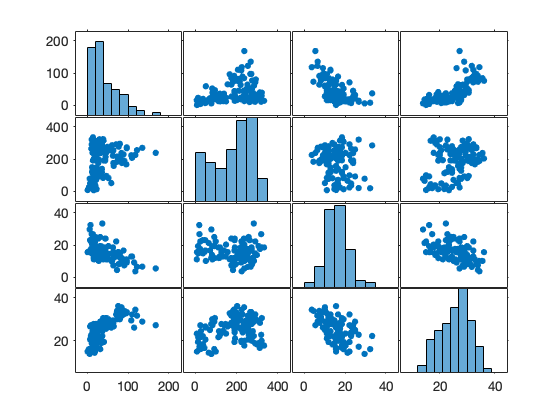

In [21]:
plotmatrix(table2array(data))

We fit a linear additive model 
$$
Y = \beta_0 + \beta_1 \texttt{solar} + \beta_2 \texttt{wind} + \beta_3 \texttt{temp} + e
$$

In [29]:
mlin = fitlm(data, 'ozone ~ solar + wind + temp')

mlin = 
Linear regression model:
    ozone ~ 1 + solar + wind + temp

Estimated Coefficients:
                   Estimate       SE        tStat        pValue  
                   ________    ________    ________    __________
    (Intercept)     -11.475      15.646    -0.73344       0.46489
    solar          0.059821    0.023186        2.58      0.011237
    wind            -2.0718     0.40672     -5.0941    1.5159e-06
    temp             2.9738     0.45635      6.5164    2.4235e-09

Number of observations: 111, Error degrees of freedom: 107
Root Mean Squared Error: 21.2
R-squared: 0.606,  Adjusted R-Squared: 0.595
F-statistic vs. constant model: 54.8, p-value = 1.51e-21


Then we do  model selection including possibly also interactions.

In [30]:
out = step(mlin, 'Criterion', 'AIC','NSteps', 3,  'Upper', 'interactions', 'Lower', 'constant', 'Verbose', 2)

   Change in AIC for adding solar:wind is -8.9758
   Change in AIC for adding solar:temp is -10.2823
   Change in AIC for adding wind:temp is -16.1119
1. Adding wind:temp, AIC = 980.6052
   Change in AIC for adding solar:wind is -0.74421
   Change in AIC for adding solar:temp is -3.987
2. Adding solar:temp, AIC = 976.6182
   Change in AIC for adding solar:wind is 0.75935
   Change in AIC for removing wind:temp is 9.8166
out = 
Linear regression model:
    ozone ~ 1 + solar*temp + wind*temp

Estimated Coefficients:
                   Estimate       SE         tStat       pValue  
                   ________    _________    _______    __________
    (Intercept)     -58.368       38.055    -1.5338       0.12809
    solar          -0.17011      0.10012    -1.6992       0.09225
    wind             3.2212       1.5856     2.0315      0.044725
    temp             4.4124       1.4851     2.9712     0.0036777
    solar:temp     0.010291    0.0042662     2.4122      0.017589
    wind:temp     

In [44]:
out2 = step(mlin, 'Criterion', 'AIC','NSteps', 3,  'Upper', 'quadratic', 'Lower', 'constant', 'Verbose', 2)

   Change in AIC for adding solar:wind is -8.9758
   Change in AIC for adding solar:temp is -10.2823
   Change in AIC for adding wind:temp is -16.1119
   Change in AIC for adding solar^2 is 1.8762
   Change in AIC for adding wind^2 is -24.5362
   Change in AIC for adding temp^2 is -12.58
1. Adding wind^2, AIC = 972.1809
   Change in AIC for adding solar:wind is -3.4382
   Change in AIC for adding solar:temp is -6.2016
   Change in AIC for adding wind:temp is 1.0573
   Change in AIC for adding solar^2 is 1.6907
   Change in AIC for adding temp^2 is -6.3985
2. Adding temp^2, AIC = 965.7824
   Change in AIC for adding solar:wind is -1.0462
   Change in AIC for adding solar:temp is -1.554
   Change in AIC for adding wind:temp is 0.78545
   Change in AIC for adding solar^2 is 1.3158
3. Adding solar:temp, AIC = 964.2285
out2 = 
Linear regression model:
    ozone ~ 1 + wind + solar*temp + wind^2 + temp^2

Estimated Coefficients:
                   Estimate       SE         tStat       pValue 

### Cross-validation

I don't now yet if CV is needed.